In [1]:
"""
Notebook for the capacity to win:
3 Matrices : 
Matrice marché:
    Marché \ Size  \ CAGR 2021-2018 \ FI \ PI

    Size = somme de tout
    FI = Fragmentation index = produit(5 plus gros market share)
    PI = Promotion intensity = Sales in volume with promo / Total sales in volume 

Matrice Marque:
    Brand \ CAGR \ INO \ Prod \ AW 

    Brand : brand bel only
    INO = rate moyen ou median ou un truc représentatif
    Prod = ratio sale out / sale in (sale in dans fichier A&P)
    AW = awareness = un truc random

Matrice Market Brand
    Market \ Brand \ CORR \ Price \ Expertise

    CORR = correlation sales de la marque x Sales du market. Pearson
    Price = prix moyen de la marque sur le marché
    Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random

Le but : Matrice de capacity to win
On scale tout MIN-MAX pour avoir un score sur 100
"""

'\nNotebook for the capacity to win:\n3 Matrices : \nMatrice marché:\n    Marché \\ Size  \\ CAGR 2021-2018 \\ FI \\ PI\n\n    Size = somme de tout\n    FI = Fragmentation index = produit(5 plus gros market share)\n    PI = Promotion intensity = Sales in volume with promo / Total sales in volume \n\nMatrice Marque:\n    Brand \\ CAGR \\ INO \\ Prod \\ AW \n\n    Brand : brand bel only\n    INO = rate moyen ou median ou un truc représentatif\n    Prod = ratio sale out / sale in (sale in dans fichier A&P)\n    AW = awareness = un truc random\n\nMatrice Market Brand\n    Market \\ Brand \\ CORR \\ Price \\ Expertise\n\n    CORR = correlation sales de la marque x Sales du market. Pearson\n    Price = prix moyen de la marque sur le marché\n    Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random\n\nLe but : Matrice de capacity to win\nOn scale tout MIN-MAX pour avoir un score sur 100\n'

In [2]:
import pandas as pd
import numpy as np

#from datamanager.DM_USA import DM_USA
from sklearn.preprocessing import MinMaxScaler, minmax_scale

import matplotlib.pyplot as plt

In [3]:
#code_aandp = ["000BQ - BOURSIN", "000LA - THE LAUGHING COW", "000MB - MINI BABYBEL", "000KC - KAUKAUNA", "000PG - PRICE'S", "000MI - MERKTS", "003NH - NURISHH"]
#bel_brands = ["BABYBEL", "THE LAUGHING COW", "BOURSIN", "KAUKAUNA", "MERKTS", "PRICES", "NURISHH"]
#data_manager = DM_USA(bel_brands, code_aandp)

In [4]:
df = pd.read_excel("data/USA_df_post_processing.xlsx")

In [5]:
df.head()

,Date,Market,Category,Sub Category,Brand,Sales in value,Sales value with promo,Sales in volume,Sales volume with promo,Price without promo,Price with promo,Price per volume,Distribution,Period
0,2017-12-31,CHEESE,CLASSIC SPREADS,CLASSIC SPREADS,1000 ISLANDS RIVER RAT CHEESE,285.014421,NaN,25.961137,NaN,10.978503,NaN,10.978503,0.013007,1
1,2017-12-31,CHEESE,CLASSIC SPREADS,CLASSIC SPREADS,AUTHENTIC MENU,1205.790000,5.277200,242.500000,2.145000,4.994717,3.637500,4.972330,1.980134,1
2,2017-12-31,CHEESE,CLASSIC SPREADS,CLASSIC SPREADS,APPEL FARM QUARK,391.079899,4.796178,80.904125,2.756167,4.966977,3.365000,4.833868,0.151621,1
3,2017-12-31,CHEESE,CLASSIC SPREADS,CLASSIC SPREADS,ASHBYS,3909.132137,53.182613,327.681769,6.832235,12.025146,10.709200,11.929660,0.848531,1
4,2017-12-31,CHEESE,CLASSIC SPREADS,CLASSIC SPREADS,NEW BRIDGE,27112.449008,995.316059,2707.353139,184.093633,10.455282,8.365867,10.014375,7.551650,1


In [6]:
df["Category"].unique()

array(['CLASSIC SPREADS', 'CREAM CHEESE', 'ENTERTAINING TRAYS',
       'EVERYDAY BLOCKS', 'EVERYDAY SHREDDED & GRATED',
       'GOURMET FRESH ITALIAN', 'GOURMET BLOCK / WEDGE / ROUND',
       'GOURMET SPREADS', 'GOURMET CRUMBLED', 'GOURMET SHREDDED / GRATED',
       'PIMENTO', 'RICOTTA AND FARMERS', 'SLICES', 'SNACK',
       'SNACKING COMBOS', 'PLANT BASED'], dtype=object)

In [31]:
df['Date']= pd.to_datetime(df['Date'])

In [32]:
df_bel = pd.read_excel("data/USA_df_bel_NODUPLICATE.xlsx")

In [33]:
df_bel.head()

,Date,Brand,Price per volume,Sales in volume,Sales in value,Distribution,Sell-in,Advertising,Promotion,A&P,MVC,Rate of Innovation,Promo Cost,HH
0,2017-12-31,BABYBEL,11.307482,250446.559440,2.831920e+06,417.403475,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2017-12-31,BOURSIN,13.745852,85626.196096,1.177005e+06,152.671400,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2017-12-31,KAUKAUNA,6.703015,444672.382865,2.792992e+06,173.182554,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2017-12-31,MERKTS,5.383924,88166.774383,4.746832e+05,77.224967,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2017-12-31,PRICES,4.762444,108331.433158,5.159224e+05,93.366316,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [34]:
df_bel['Date']= pd.to_datetime(df_bel['Date'])

In [35]:
df_bel.columns

Index(['Date', 'Brand', 'Price per volume', 'Sales in volume',
       'Sales in value', 'Distribution', 'Sell-in', 'Advertising', 'Promotion',
       'A&P', 'MVC', 'Rate of Innovation', 'Promo Cost', 'HH'],
      dtype='object')

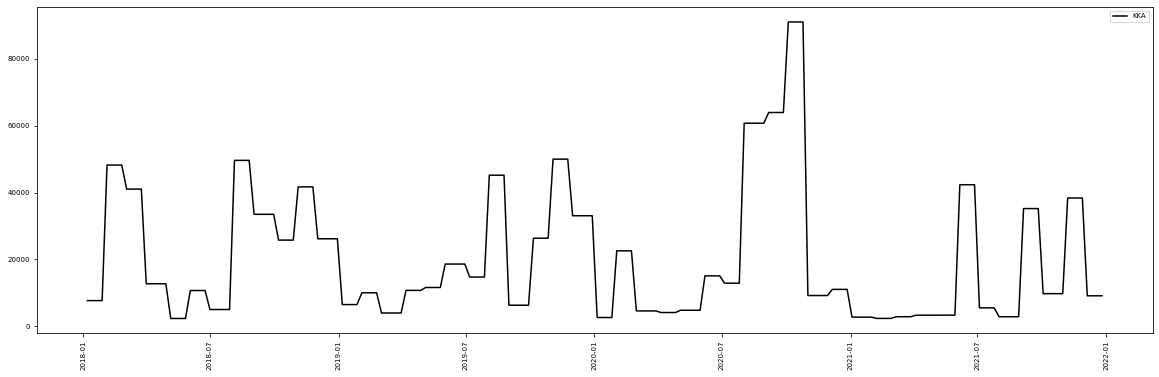

In [36]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 7})
fig, ax = plt.subplots()
#x = data_manager.df_bel[data_manager.df_bel["Brand"] == "KAUKAUNA"]["Date"].values
x = df_bel[df_bel["Brand"] == "KAUKAUNA"]["Date"].values
#y = data_manager.df_bel[data_manager.df_bel["Brand"] == "KAUKAUNA"]["A&P"].values
y = df_bel[df_bel["Brand"] == "KAUKAUNA"]["A&P"].values
plt.plot(x, y, color="black", label="KKA")
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Market matrix

In [12]:
"""Marché \ Size  \ CAGR 2021-2018 \ FI \ PI

Size = somme de tout
FI = Fragmentation index = produit(5 plus gros market share)
PI = Promotion intensity = Sales in volume with promo / Total sales in volume """

'Marché \\ Size  \\ CAGR 2021-2018 \\ FI \\ PI\n\nSize = somme de tout\nFI = Fragmentation index = produit(5 plus gros market share)\nPI = Promotion intensity = Sales in volume with promo / Total sales in volume '

In [13]:
#def get_df(df):
#    df_temp = df[df["Category"].isin(["CREAM CHEESE BLOCKS", "CREAM CHEESE TUBS", "SINGLE SERVE"])]
#    df_temp["Category"] = "CREAM CHEESE"
#    df_temp = pd.concat([df_temp, df[~df["Category"].isin(["CREAM CHEESE BLOCKS", "CREAM CHEESE TUBS", "SINGLE SERVE"])]])
#    df_temp2 = df_temp[df_temp["Category"].isin(["GOURMET"])]
#    df_temp2["Category"] = df_temp2["Sub Category"]
#    df_temp2 = pd.concat([df_temp2, df_temp[~df_temp["Category"].isin(["GOURMET"])]])
#    return df_temp2

In [14]:
#df = get_df(data_manager.df)

In [15]:
#data_manager.df["Category"].unique()

In [16]:
df.groupby('Category', as_index=False)['Sales in volume'].sum()

,Category,Sales in volume
0,CLASSIC SPREADS,8.195918e+07
1,CREAM CHEESE,1.792876e+09
2,ENTERTAINING TRAYS,1.681786e+08
3,EVERYDAY BLOCKS,2.749236e+09
4,EVERYDAY SHREDDED & GRATED,5.617693e+09
5,GOURMET BLOCK / WEDGE / ROUND,1.470404e+08
6,GOURMET CRUMBLED,2.139516e+08
7,GOURMET FRESH ITALIAN,2.900519e+08
8,GOURMET SHREDDED / GRATED,4.740396e+07
9,GOURMET SPREADS,7.936931e+07


In [17]:
def compute_size(df):
    return df.groupby('Category', as_index=False)['Sales in volume'].sum().rename(columns={'Sales in volume':'Size'})

In [18]:
def cagr(group):
    s = group.reset_index().sort_values(by='Date')
    return s[0].values[-1] - s[0].values[0]

def compute_cagr(df, by:str):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df.Date >=  '2018-01-01']
    df = df.set_index('Date').groupby([by, pd.Grouper(freq="Y")]).agg({'Sales in volume':'sum'})
    df_cagr = pd.DataFrame(df.stack().groupby(by).agg(cagr))
    return df_cagr.reset_index().rename(columns={0:'CAGR'})

In [67]:
def fragmentation_index(series, n):
    size = series.sum()
    return series.reset_index()\
                 .sort_values('Sales in volume', ascending=False)[:n]['Sales in volume']\
                 .apply(lambda x:x/size)\
                 .agg('prod')

def compute_fragmentation_index(df):
    df_FI = df.groupby(['Category', 'Brand'])['Sales in volume']\
              .agg(sum).groupby('Category')\
              .agg(fragmentation_index, 5)
    return pd.DataFrame(df_FI).reset_index().rename(columns={'Sales in volume':'FI'})

In [68]:
def compute_promotion_intensity(df):
    size = df.groupby('Category')['Sales in volume'].sum()
    promo = df.groupby('Category')['Sales volume with promo'].sum()
    df_PI = promo / size
    return pd.DataFrame(df_PI).reset_index().rename(columns={0:'PI'})

In [69]:
df_size = compute_size(df)
df_cagr = compute_cagr(df, by='Category')
df_FI = compute_fragmentation_index(df)
df_PI = compute_promotion_intensity(df)

df_category = pd.merge(df_size, df_cagr, on='Category')
df_category = pd.merge(df_category, df_FI, on='Category')
df_category = pd.merge(df_category, df_PI, on='Category')
df_category = df_category.set_index('Category')

In [70]:
display(df_category)

,Size,CAGR,FI,PI
Category,,,,
CLASSIC SPREADS,8.195918e+07,5.355792e+05,1.334413e-05,0.099335
CREAM CHEESE,1.792876e+09,6.564134e+07,8.340108e-09,0.124086
ENTERTAINING TRAYS,1.681786e+08,1.357482e+07,3.191617e-06,0.148030
EVERYDAY BLOCKS,2.749236e+09,6.068280e+06,1.031351e-05,0.161144
EVERYDAY SHREDDED & GRATED,5.617693e+09,2.182305e+08,7.538925e-07,0.162197
GOURMET BLOCK / WEDGE / ROUND,1.470404e+08,1.264157e+07,2.701470e-05,0.097007
GOURMET CRUMBLED,2.139516e+08,1.346060e+07,1.015334e-05,0.081275
GOURMET FRESH ITALIAN,2.900519e+08,6.760760e+06,2.936274e-05,0.214297
GOURMET SHREDDED / GRATED,4.740396e+07,6.432743e+06,2.795696e-03,0.092367


# Brand Matrix

In [71]:
"""Brand \ CAGR \ INO \ Prod \ AW

Brand : brand bel only
INO = rate moyen ou median ou un truc représentatif
Prod = ratio sale out / sale in (sale in dans fichier A&P) = somme des sales out / somme de mes sale in /\ R1000 - NET SALES dans finance
AW = awareness = un truc random
TODO : MVC = margin variable cost, mm calcul que pour Inno
"""

'Brand \\ CAGR \\ INO \\ Prod \\ AW\n\nBrand : brand bel only\nINO = rate moyen ou median ou un truc représentatif\nProd = ratio sale out / sale in (sale in dans fichier A&P) = somme des sales out / somme de mes sale in /\\ R1000 - NET SALES dans finance\nAW = awareness = un truc random\nTODO : MVC = margin variable cost, mm calcul que pour Inno\n'

In [103]:
df_bel_brands[df_bel_brands.Date >= '2020-01-01'].groupby('Brand')['MVC'].agg("max")

Brand
BABYBEL             2.020438e+06
BOURSIN             1.175463e+06
KAUKAUNA            4.055431e+05
MERKTS              1.070581e+05
NURISHH             6.140310e+03
PRICES              1.512222e+05
THE LAUGHING COW    1.358260e+06
Name: MVC, dtype: float64

In [72]:
def compute_inno(df, how:str):
    return df[df.Date >= '2020-01-01'].groupby('Brand')['Rate of Innovation'].agg(how)

<AxesSubplot:>

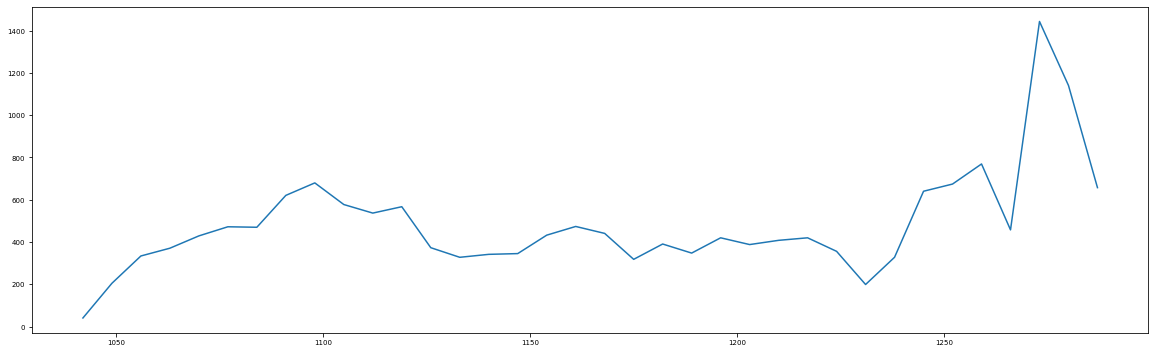

In [73]:
df_bel[df_bel["Brand"] == "NURISHH"]["Sales in volume"].plot()

In [74]:
# Extend NURISHH dataframe
df_nurishh = pd.DataFrame(pd.date_range(start='2017-12-31', end='2021-04-21', freq='W'))
df_nurishh = df_nurishh.rename(columns={0:"Date"})
df_nurishh["Brand"] = ["NURISHH"] * df_nurishh.shape[0]
for feature in ['Price per volume', 'Sales in volume', 'Sales in value',
       'Distribution', 'Sell-in', 'Advertising', 'Promotion', 'A&P', 'MVC',
       'Rate of Innovation', 'Promo Cost', 'HH']:
    df_nurishh[feature] = [np.nan] * df_nurishh.shape[0]
df_nurishh = pd.concat([df_nurishh, df_bel[df_bel["Brand"] == "NURISHH"]])
df_nurishh

,Date,Brand,Price per volume,Sales in volume,Sales in value,Distribution,Sell-in,Advertising,Promotion,A&P,MVC,Rate of Innovation,Promo Cost,HH
0,2017-12-31,NURISHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-07,NURISHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-14,NURISHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-21,NURISHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-28,NURISHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,2021-11-28,NURISHH,10.364371,769.356982,7919.083995,0.944215,8421.819300,57.217166,42.709821,24981.746625,4459.899975,NaN,787.37411,NaN
1266,2021-12-05,NURISHH,11.928219,457.872751,5438.939264,0.724020,7742.594925,111.101614,140.167385,62817.249700,4983.801075,NaN,787.37411,NaN
1273,2021-12-12,NURISHH,10.335185,1442.985391,14933.723072,0.920482,7742.594925,111.101614,140.167385,62817.249700,4983.801075,NaN,787.37411,NaN
1280,2021-12-19,NURISHH,10.403408,1140.332896,11849.904035,0.899482,7742.594925,111.101614,140.167385,62817.249700,4983.801075,NaN,787.37411,NaN


In [75]:
# Concatenate NURISHH dataframe to other brands dataframe
df_bel_brands = pd.concat([df_bel[df_bel["Brand"] != "NURISHH"], df_nurishh]).reset_index(drop=True)

In [76]:
df_cagr = compute_cagr(df_bel_brands, by='Brand')
df_inno = compute_inno(df_bel_brands, how='mean')

df_brand = pd.merge(df_cagr, df_inno, on='Brand')
#df_brand['Prod'] = 2
df_brand['Awereness'] = [68, 29, 15, 8, 6, 7, 72]

df_brand = df_brand.set_index('Brand')

In [77]:
display(df_brand)

,CAGR,Rate of Innovation,Awereness
Brand,,,
BABYBEL,1.018893e+06,0.096088,68
BOURSIN,1.137386e+06,0.042073,29
KAUKAUNA,-2.743428e+05,0.084421,15
MERKTS,-1.774576e+05,0.397417,8
NURISHH,1.740715e+04,NaN,6
PRICES,-3.714655e+05,0.002778,7
THE LAUGHING COW,4.216595e+05,0.054846,72


# Market Brand Matrix

In [78]:
"""Matrice Market Brand
Market \ Brand \ CORR \ Price \ Expertise

CORR = correlation sales de la marque x Sales du market. Pearson
Price = prix moyen de la marque - prix moyen du marché
TODO : Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random
TODO : add dans fill bel_brands : (R1000 - NET SALES, MVC dans finance et A&P) en Dollar, !don't forget to *1000!
"""

"Matrice Market Brand\nMarket \\ Brand \\ CORR \\ Price \\ Expertise\n\nCORR = correlation sales de la marque x Sales du market. Pearson\nPrice = prix moyen de la marque - prix moyen du marché\nTODO : Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random\nTODO : add dans fill bel_brands : (R1000 - NET SALES, MVC dans finance et A&P) en Dollar, !don't forget to *1000!\n"

In [79]:
df_temp = df.groupby(['Category', 'Date'])['Sales in volume'].agg('mean').sort_index().reset_index()

Category
CLASSIC SPREADS                  AxesSubplot(0.125,0.125;0.775x0.755)
CREAM CHEESE                     AxesSubplot(0.125,0.125;0.775x0.755)
ENTERTAINING TRAYS               AxesSubplot(0.125,0.125;0.775x0.755)
EVERYDAY BLOCKS                  AxesSubplot(0.125,0.125;0.775x0.755)
EVERYDAY SHREDDED & GRATED       AxesSubplot(0.125,0.125;0.775x0.755)
GOURMET BLOCK / WEDGE / ROUND    AxesSubplot(0.125,0.125;0.775x0.755)
GOURMET CRUMBLED                 AxesSubplot(0.125,0.125;0.775x0.755)
GOURMET FRESH ITALIAN            AxesSubplot(0.125,0.125;0.775x0.755)
GOURMET SHREDDED / GRATED        AxesSubplot(0.125,0.125;0.775x0.755)
GOURMET SPREADS                  AxesSubplot(0.125,0.125;0.775x0.755)
PIMENTO                          AxesSubplot(0.125,0.125;0.775x0.755)
PLANT BASED                      AxesSubplot(0.125,0.125;0.775x0.755)
RICOTTA AND FARMERS              AxesSubplot(0.125,0.125;0.775x0.755)
SLICES                           AxesSubplot(0.125,0.125;0.775x0.755)
SNACK      

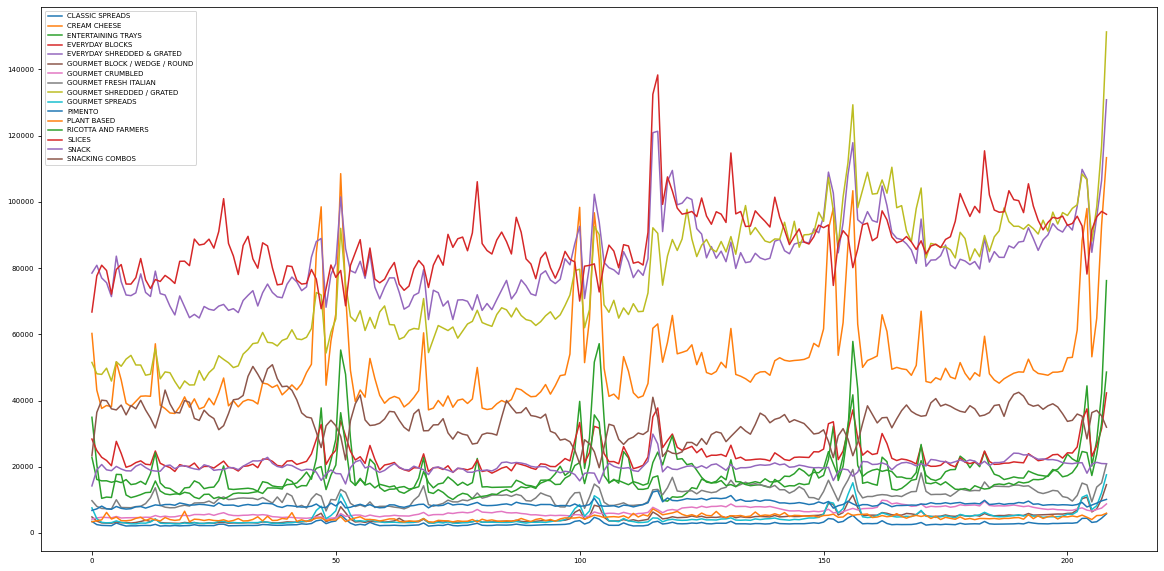

In [80]:
df_temp.groupby('Category')['Sales in volume'].plot(use_index=False, figsize=(20, 10), legend=True)

Brand
BABYBEL             AxesSubplot(0.125,0.125;0.775x0.755)
BOURSIN             AxesSubplot(0.125,0.125;0.775x0.755)
KAUKAUNA            AxesSubplot(0.125,0.125;0.775x0.755)
MERKTS              AxesSubplot(0.125,0.125;0.775x0.755)
NURISHH             AxesSubplot(0.125,0.125;0.775x0.755)
PRICES              AxesSubplot(0.125,0.125;0.775x0.755)
THE LAUGHING COW    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sales in volume, dtype: object

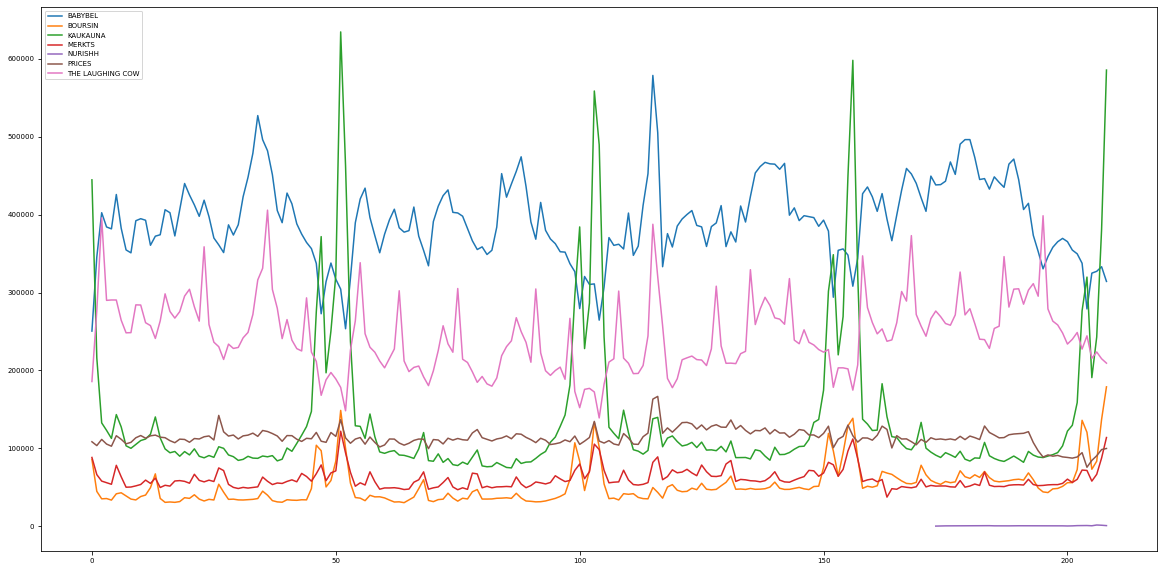

In [81]:
df_bel_brands.groupby(['Brand'])['Sales in volume'].plot(use_index=False, figsize=(20, 10), legend=True)

In [82]:
def compute_corr_table(df, df_bel, method:str):
    brand_table = pd.pivot_table(data=df_bel, values='Sales in volume', index='Date', columns='Brand').reset_index(drop=True)
    category_table = pd.pivot_table(data=df, values='Sales in volume', index='Date', columns='Category').reset_index(drop=True)
    brand_dict = dict()
    for brand in brand_table.columns:
        cat_dict = dict()
        for cat in category_table.columns:
            cat_dict[cat] = brand_table[brand].corr(category_table[cat], method=method)
            #print(f'{brand} on {cat} : {brand_table[brand].corr(category_table[cat], method="kendall")}')
        brand_dict[brand] = cat_dict
    return pd.DataFrame(brand_dict)

In [83]:
def compute_price(df, df_bel):
    #Price = 1 - abs(prix moyen de la marque - prix moyen du marché)/prix moyen du marché
    mean_price_brands = df_bel.groupby('Brand', as_index=False)['Price per volume'].agg('mean').fillna(0.0)
    mean_price_categories = df.groupby('Category', as_index=False)['Price per volume'].agg('mean').fillna(0.0)

    brand_dict = dict()
    for brand in mean_price_brands.Brand.unique():
        cat_dict = dict()
        for cat in mean_price_categories.Category.unique():
            cat_dict[cat] = 1 / abs(mean_price_brands[mean_price_brands.Brand==brand]['Price per volume'].values - \
                                    mean_price_categories[mean_price_categories.Category==cat]['Price per volume'].values)[0]#
            #cat_dict[cat] = 1 - (abs(
            #    (
            #        mean_price_brands[mean_price_brands.Brand==brand]['Price per volume'].values - \
            #        mean_price_categories[mean_price_categories.Category==cat]['Price per volume'].values
            #    ))\
            #    /mean_price_categories[mean_price_categories.Category==cat]['Price per volume'].values)[0]
        brand_dict[brand] = cat_dict
    return pd.DataFrame(brand_dict)

In [84]:
#Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random
def compute_expertise(df, df_bel):
    brands = ["BABYBEL", "BOURSIN", "KAUKAUNA", "MERKTS", "NURISHH", "PRICES", "THE LAUGHING COW"]#df_bel.Brand.unique()
    #categories = df.Category.unique()
    categories = ['CLASSIC SPREADS', 'CREAM CHEESE', 'ENTERTAINING TRAYS',
       'EVERYDAY BLOCKS', 'EVERYDAY SHREDDED & GRATED',
       'GOURMET BLOCK / WEDGE / ROUND', 'GOURMET CRUMBLED',
       'GOURMET FRESH ITALIAN', 'GOURMET SHREDDED / GRATED',
       'GOURMET SPREADS', 'PIMENTO', 'PLANT BASED', 'RICOTTA AND FARMERS',
       'SLICES', 'SNACK', 'SNACKING COMBOS']
    #return pd.DataFrame(np.random.randint(0, 100, size=(len(categories), len(brands))), columns=brands, index=categories)
    return pd.DataFrame(np.zeros((len(categories), len(brands))), columns=brands, index=categories)

In [85]:
df_corr = compute_corr_table(df, df_bel_brands, method='pearson')
df_price = compute_price(df, df_bel_brands)
df_expertise = compute_expertise(df, df_bel_brands)

In [86]:
def make_pretty(styler, vmin=-1, vmax=1):
    styler.background_gradient(axis=None, vmin=vmin, vmax=vmax, cmap="seismic")
    return styler

df_corr.style.pipe(make_pretty)

,BABYBEL,BOURSIN,KAUKAUNA,MERKTS,NURISHH,PRICES,THE LAUGHING COW
CLASSIC SPREADS,-0.397481,0.923393,0.861286,0.856407,0.522725,0.114862,-0.300909
CREAM CHEESE,-0.429574,0.918884,0.856717,0.789707,0.559772,0.071000,-0.330583
ENTERTAINING TRAYS,-0.494366,0.838811,0.898882,0.766217,0.477816,-0.117359,-0.363797
EVERYDAY BLOCKS,-0.329728,0.791985,0.772022,0.808925,0.495403,0.183559,-0.193098
EVERYDAY SHREDDED & GRATED,-0.099694,0.696012,0.521617,0.588631,0.424742,0.192485,-0.053363
GOURMET BLOCK / WEDGE / ROUND,-0.259509,0.903858,0.698073,0.617890,0.509863,-0.076303,-0.148670
GOURMET CRUMBLED,0.345133,0.343634,-0.070429,0.044625,-0.070420,0.219122,0.166393
GOURMET FRESH ITALIAN,0.080317,0.635451,0.312746,0.447511,0.372044,0.282784,-0.048681
GOURMET SHREDDED / GRATED,0.011260,0.652128,0.342347,0.358761,0.368803,0.047061,-0.028624
GOURMET SPREADS,-0.418226,0.964715,0.877293,0.723312,0.559126,-0.106974,-0.279196


In [87]:
df_price.style.pipe(make_pretty, 0, 10)

,BABYBEL,BOURSIN,KAUKAUNA,MERKTS,NURISHH,PRICES,THE LAUGHING COW
CLASSIC SPREADS,0.283701,0.141743,0.657279,0.324000,0.375820,0.255845,0.978017
CREAM CHEESE,0.182944,0.111156,2.381513,0.873289,0.217289,0.508314,1.088319
ENTERTAINING TRAYS,0.341461,0.154828,0.472218,0.271543,0.484354,0.221983,0.617772
EVERYDAY BLOCKS,0.567963,0.189005,0.304360,0.206161,1.115215,0.176281,0.358856
EVERYDAY SHREDDED & GRATED,0.227792,0.126260,1.523712,0.450189,0.283609,0.328571,6.355467
GOURMET BLOCK / WEDGE / ROUND,0.180471,0.497295,0.094453,0.082289,0.156127,0.077074,0.099124
GOURMET CRUMBLED,6.870812,0.272055,0.204052,0.154662,1.391893,0.137214,0.227181
GOURMET FRESH ITALIAN,0.258511,0.135163,0.848932,0.364571,0.332854,0.280494,1.472747
GOURMET SHREDDED / GRATED,3.896085,0.264071,0.208786,0.157367,1.646575,0.139338,0.233065
GOURMET SPREADS,0.486892,0.677348,0.140843,0.115405,0.342720,0.105404,0.151489


In [88]:
df_expertise.style.pipe(make_pretty)

,BABYBEL,BOURSIN,KAUKAUNA,MERKTS,NURISHH,PRICES,THE LAUGHING COW
CLASSIC SPREADS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CREAM CHEESE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENTERTAINING TRAYS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EVERYDAY BLOCKS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EVERYDAY SHREDDED & GRATED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET BLOCK / WEDGE / ROUND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET CRUMBLED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET FRESH ITALIAN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET SHREDDED / GRATED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET SPREADS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Scaling

In [89]:
df_category

,Size,CAGR,FI,PI
Category,,,,
CLASSIC SPREADS,8.195918e+07,5.355792e+05,1.334413e-05,0.099335
CREAM CHEESE,1.792876e+09,6.564134e+07,8.340108e-09,0.124086
ENTERTAINING TRAYS,1.681786e+08,1.357482e+07,3.191617e-06,0.148030
EVERYDAY BLOCKS,2.749236e+09,6.068280e+06,1.031351e-05,0.161144
EVERYDAY SHREDDED & GRATED,5.617693e+09,2.182305e+08,7.538925e-07,0.162197
GOURMET BLOCK / WEDGE / ROUND,1.470404e+08,1.264157e+07,2.701470e-05,0.097007
GOURMET CRUMBLED,2.139516e+08,1.346060e+07,1.015334e-05,0.081275
GOURMET FRESH ITALIAN,2.900519e+08,6.760760e+06,2.936274e-05,0.214297
GOURMET SHREDDED / GRATED,4.740396e+07,6.432743e+06,2.795696e-03,0.092367


In [90]:
def scale_category(df_category):
    Size_scaler = MinMaxScaler(feature_range=(0, 100))
    CAGR_scaler = MinMaxScaler(feature_range=(0, 100))
    FI_scaler = MinMaxScaler(feature_range=(0, 100))
    PI_scaler = MinMaxScaler(feature_range=(0, 100))

    df_category['Size'] = Size_scaler.fit_transform(df_category[['Size']])
    df_category['CAGR'] = CAGR_scaler.fit_transform(df_category[['CAGR']])
    df_category['FI'] = FI_scaler.fit_transform(df_category[['FI']])
    df_category['PI'] = PI_scaler.fit_transform(df_category[['PI']])
    
    df_category = df_category.fillna(0)
    
    df_category['Total'] = df_category[['Size', 'CAGR', 'FI', 'PI']].sum(axis=1)
    return df_category

In [91]:
df_category_scaled = scale_category(df_category.copy())
df_category_scaled.to_clipboard()
df_category_scaled.style.pipe(make_pretty, 0, 100)

,Size,CAGR,FI,PI,Total
Category,,,,,
CLASSIC SPREADS,0.620349,0.393371,0.477013,26.708410,28.199142
CREAM CHEESE,31.335401,30.182608,0.000000,42.488011,104.006020
ENTERTAINING TRAYS,2.168193,6.359495,0.113864,57.753139,66.394691
EVERYDAY BLOCKS,48.504331,2.924866,0.368610,66.113213,117.911018
EVERYDAY SHREDDED & GRATED,100.000000,100.000000,0.026668,66.784561,266.811229
GOURMET BLOCK / WEDGE / ROUND,1.788712,5.932483,0.966000,25.224503,33.911698
GOURMET CRUMBLED,2.989927,6.307235,0.362880,15.195215,24.855258
GOURMET FRESH ITALIAN,4.356110,3.241711,1.049988,100.000000,108.647810
GOURMET SHREDDED / GRATED,0.000000,3.091626,100.000000,22.266204,125.357830


In [92]:
df_brand

,CAGR,Rate of Innovation,Awereness
Brand,,,
BABYBEL,1.018893e+06,0.096088,68
BOURSIN,1.137386e+06,0.042073,29
KAUKAUNA,-2.743428e+05,0.084421,15
MERKTS,-1.774576e+05,0.397417,8
NURISHH,1.740715e+04,NaN,6
PRICES,-3.714655e+05,0.002778,7
THE LAUGHING COW,4.216595e+05,0.054846,72


In [93]:
def scale_brand(df_brand):
    CAGR_scaler = MinMaxScaler(feature_range=(0, 100))
    Inno_scaler = MinMaxScaler(feature_range=(0, 100))
    Awereness_scaler = MinMaxScaler(feature_range=(0, 100))
    
    df_brand['CAGR'] = CAGR_scaler.fit_transform(df_brand[['CAGR']])
    df_brand['Rate of Innovation'] = Inno_scaler.fit_transform(df_brand[['Rate of Innovation']])
    df_brand['Awereness'] = Awereness_scaler.fit_transform(df_brand[['Awereness']])
    
    df_brand = df_brand.fillna(0)
    df_brand['Total'] = df_brand[['CAGR', 'Rate of Innovation', 'Awereness']].sum(axis=1)
    return df_brand

In [94]:
df_brand_scaled = scale_brand(df_brand.copy())
df_brand_scaled.to_clipboard()
df_brand_scaled.style.pipe(make_pretty, 0, 100)

,CAGR,Rate of Innovation,Awereness,Total
Brand,,,,
BABYBEL,92.146816,23.644345,93.939394,209.730554
BOURSIN,100.000000,9.957158,34.848485,144.805643
KAUKAUNA,6.436865,20.688001,13.636364,40.761230
MERKTS,12.857988,100.000000,3.030303,115.888291
NURISHH,25.772763,0.000000,0.000000,25.772763
PRICES,0.000000,0.000000,1.515152,1.515152
THE LAUGHING COW,52.564823,13.193931,100.000000,165.758754


In [60]:
def scale_market_brand(df_corr, df_price, df_expertise):
    df_corr_scaled = pd.DataFrame(minmax_scale(df_corr.T).T * 100, index=df_corr.index.values, columns=df_corr.columns.values)
    df_price_scaled = pd.DataFrame(minmax_scale(df_price.T).T * 100, index=df_price.index.values, columns=df_price.columns.values)
    df_expertise_scaled = pd.DataFrame(minmax_scale(df_expertise.T).T * 100, index=df_expertise.index.values, columns=df_expertise.columns.values)
    
    #corr_scaler = MinMaxScaler(feature_range=(0, 100))
    #price_scaler = MinMaxScaler(feature_range=(0, 100))
    #expertise_scaler = MinMaxScaler(feature_range=(0, 100))
    
    #df_corr[df_corr.columns] = corr_scaler.fit_transform(df_corr[df_corr.columns])
    #df_price[df_price.columns] = price_scaler.fit_transform(df_price[df_price.columns])
    #df_expertise[df_expertise.columns] = expertise_scaler.fit_transform(df_expertise[df_expertise.columns])
    #display(df_expertise)
    return df_corr_scaled + df_price_scaled + df_expertise_scaled
    

In [61]:
pd.DataFrame(minmax_scale(df_corr.T).T * 100, index=df_corr.index.values, columns=df_corr.columns.values).style.pipe(make_pretty, 0, 100)

,BABYBEL,BOURSIN,KAUKAUNA,MERKTS,NURISHH,PRICES,THE LAUGHING COW
CLASSIC SPREADS,0.000000,100.000000,95.298073,94.928702,69.666446,38.788206,7.311186
CREAM CHEESE,0.000000,100.000000,95.389806,90.420424,73.368695,37.121932,7.341021
ENTERTAINING TRAYS,0.000000,95.688444,100.000000,90.478037,69.778126,27.059566,9.371518
EVERYDAY BLOCKS,0.000000,98.512264,96.759084,100.000000,72.465477,45.078384,11.999249
EVERYDAY SHREDDED & GRATED,0.000000,100.000000,78.083065,86.504964,65.908369,36.719474,5.822693
GOURMET BLOCK / WEDGE / ROUND,0.000000,100.000000,82.311226,75.418895,66.133243,15.747914,9.527442
GOURMET CRUMBLED,100.000000,99.639331,0.000000,27.686435,0.002345,69.676991,56.988321
GOURMET FRESH ITALIAN,18.855797,100.000000,52.830081,72.528697,61.497675,48.450533,0.000000
GOURMET SHREDDED / GRATED,5.858709,100.000000,54.494267,56.905335,58.380517,11.117753,0.000000
GOURMET SPREADS,0.000000,100.000000,93.678574,82.544226,70.671981,22.506536,10.053259


In [62]:
pd.DataFrame(minmax_scale(df_price.T).T * 100, index=df_price.index.values, columns=df_price.columns.values).style.pipe(make_pretty, 0, 100)

,BABYBEL,BOURSIN,KAUKAUNA,MERKTS,NURISHH,PRICES,THE LAUGHING COW
CLASSIC SPREADS,16.975095,0.000000,61.646768,21.793911,27.990523,13.644132,100.000000
CREAM CHEESE,3.161950,0.000000,100.000000,33.568850,4.674706,17.493205,43.040049
ENTERTAINING TRAYS,40.314328,0.000000,68.558974,25.211358,71.180563,14.506015,100.000000
EVERYDAY BLOCKS,41.715657,1.355186,13.640929,3.182352,100.000000,0.000000,19.444924
EVERYDAY SHREDDED & GRATED,1.629934,0.000000,22.433863,5.200161,2.525989,3.247783,100.000000
GOURMET BLOCK / WEDGE / ROUND,24.605287,100.000000,4.135536,1.240922,18.812140,0.000000,5.247190
GOURMET CRUMBLED,100.000000,2.002512,0.992607,0.259123,18.633124,0.000000,1.336102
GOURMET FRESH ITALIAN,9.221720,0.000000,53.362579,17.150966,14.779735,10.865217,100.000000
GOURMET SHREDDED / GRATED,100.000000,3.320242,1.848616,0.479892,40.120809,0.000000,2.494897
GOURMET SPREADS,66.700289,100.000000,6.196214,1.748651,41.492908,0.000000,8.057516


In [63]:
pd.DataFrame(minmax_scale(df_expertise.T).T * 100, index=df_expertise.index.values, columns=df_expertise.columns.values).style.pipe(make_pretty, 0, 100)

,BABYBEL,BOURSIN,KAUKAUNA,MERKTS,NURISHH,PRICES,THE LAUGHING COW
CLASSIC SPREADS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CREAM CHEESE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENTERTAINING TRAYS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EVERYDAY BLOCKS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EVERYDAY SHREDDED & GRATED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET BLOCK / WEDGE / ROUND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET CRUMBLED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET FRESH ITALIAN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET SHREDDED / GRATED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOURMET SPREADS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
df_market_brand_scaled = scale_market_brand(df_corr.copy(), df_price.copy(), df_expertise.copy())
df_market_brand_scaled.to_clipboard()
df_market_brand_scaled.style.pipe(make_pretty, 0, 100)

,BABYBEL,BOURSIN,KAUKAUNA,MERKTS,NURISHH,PRICES,THE LAUGHING COW
CLASSIC SPREADS,16.975095,100.000000,156.944840,116.722613,97.656969,52.432338,107.311186
CREAM CHEESE,3.161950,100.000000,195.389806,123.989275,78.043401,54.615138,50.381069
ENTERTAINING TRAYS,40.314328,95.688444,168.558974,115.689395,140.958690,41.565582,109.371518
EVERYDAY BLOCKS,41.715657,99.867449,110.400012,103.182352,172.465477,45.078384,31.444173
EVERYDAY SHREDDED & GRATED,1.629934,100.000000,100.516928,91.705124,68.434357,39.967257,105.822693
GOURMET BLOCK / WEDGE / ROUND,24.605287,200.000000,86.446763,76.659817,84.945382,15.747914,14.774632
GOURMET CRUMBLED,200.000000,101.641842,0.992607,27.945558,18.635469,69.676991,58.324423
GOURMET FRESH ITALIAN,28.077518,100.000000,106.192660,89.679663,76.277410,59.315750,100.000000
GOURMET SHREDDED / GRATED,105.858709,103.320242,56.342882,57.385226,98.501327,11.117753,2.494897
GOURMET SPREADS,66.700289,200.000000,99.874788,84.292877,112.164888,22.506536,18.110775


In [65]:
def compute_ctw(df_category_scaled, df_brand_scaled, df_market_brand_scaled, coefs={"category": 16, "brand": 16, "fit": 6}):
    indexes = df_category_scaled.index.values
    nrows = df_category_scaled.shape[0]
    columns = df_brand_scaled.index.values
    ncolumns = df_brand_scaled.shape[0]
    
    df_category_scaled = df_category_scaled[["Total"]]
    for i in range(ncolumns - 1):
        df_category_scaled[i] = df_category_scaled["Total"]
    df_category_scaled.columns = columns
    
    df_brand_scaled = df_brand_scaled.T.iloc[-1:, :]
    df_brand_scaled.columns.name = ''
    df_brand_scaled = pd.DataFrame().append([df_brand_scaled.reset_index().drop('index', axis=1)] * nrows, ignore_index=True)
    df_brand_scaled.index = indexes
    
    return (df_category_scaled / coefs["category"]) + (df_brand_scaled / coefs["brand"]) + (df_market_brand_scaled / coefs["fit"])

In [66]:
compute_ctw(df_category_scaled, df_brand_scaled, df_market_brand_scaled).to_clipboard()
compute_ctw(df_category_scaled, df_brand_scaled, df_market_brand_scaled).T.style.pipe(make_pretty, 0, 50)

<ipython-input-65-617495348909>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category_scaled[i] = df_category_scaled["Total"]


Category,CLASSIC SPREADS,CREAM CHEESE,ENTERTAINING TRAYS,EVERYDAY BLOCKS,EVERYDAY SHREDDED & GRATED,GOURMET BLOCK / WEDGE / ROUND,GOURMET CRUMBLED,GOURMET FRESH ITALIAN,GOURMET SHREDDED / GRATED,GOURMET SPREADS,PIMENTO,PLANT BASED,RICOTTA AND FARMERS,SLICES,SNACK,SNACKING COMBOS
BABYBEL,17.669975,20.135528,23.969766,27.407170,30.053850,19.268147,47.972267,24.512610,38.586142,27.245681,21.798668,19.368165,16.833966,37.241542,39.527369,51.258293
BOURSIN,27.449652,32.217396,29.140978,33.041328,42.391054,44.442792,27.521433,32.441883,34.105257,45.404492,14.373572,25.798698,29.382994,24.274227,16.307254,19.751279
KAUKAUNA,30.437683,41.612921,34.783291,28.293979,35.974433,19.014477,4.243785,26.971217,19.772922,22.214181,19.285288,9.151553,23.450537,26.779941,17.382293,9.372659
MERKTS,28.429420,34.408274,30.667136,31.786477,39.201241,22.078761,13.431385,28.914493,24.642087,24.312637,16.019367,25.272633,43.453169,23.818657,17.242414,12.794279
NURISHH,19.619592,21.118407,29.246464,37.701444,29.690559,17.827468,6.247483,21.048563,25.862550,23.325752,7.605817,29.534248,17.499054,16.481930,18.224515,16.144059
PRICES,10.566053,15.697596,11.164846,14.954161,23.429942,4.778455,13.238302,16.705519,9.782520,6.866593,16.834780,14.681107,11.490726,25.117647,15.669085,11.530121
THE LAUGHING COW,29.977753,25.257143,32.731060,22.947018,44.671073,14.881467,21.611433,33.751453,18.610603,16.399191,12.844393,12.041433,16.240479,37.788980,46.098106,33.277819
